<a href="https://colab.research.google.com/github/RKNahid/PMITProject242113/blob/main/PMIT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.signal import hilbert
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/PMIT/REM_NREM.csv')
data.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89096 entries, 0 to 89095
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Stage             89096 non-null  object 
 1   MeanP_Alpha_F4          89096 non-null  float64
 2   MedianF_Alpha_F4        89096 non-null  float64
 3   MeanF_Alpha_F4          89096 non-null  float64
 4   Spectral Edge_Alpha_F4  89096 non-null  float64
 5   PeakF_Alpha_F4          89096 non-null  float64
 6   MeanP_Beta_F4           89096 non-null  float64
 7   MedianF_Beta_F4         89096 non-null  float64
 8   MeanF_Beta_F4           89096 non-null  float64
 9   Spectral Edge_Beta_F4   89096 non-null  float64
 10  PeakF_Beta_F4           89096 non-null  float64
 11  MeanP_Theta_F4          89096 non-null  float64
 12  MedianF_Theta_F4        89096 non-null  float64
 13  MeanF_Theta_F4          89096 non-null  float64
 14  Spectral Edge_Theta_F4  89096 non-null

In [5]:
data.isnull().sum()

,0
Sleep_Stage,0
MeanP_Alpha_F4,0
MedianF_Alpha_F4,0
MeanF_Alpha_F4,0
Spectral Edge_Alpha_F4,0
...,...
MeanP_Gamma_O2,0
MedianF_Gamma_O2,0
MeanF_Gamma_O2,0
Spectral Edge_Gamma_O2,0


In [6]:
numeric_data = data.select_dtypes(include=[np.number])

z_scores_numeric = numeric_data.apply(zscore)

outliers_z_numeric = (z_scores_numeric.abs() > 3).sum()

outliers_z_numeric[outliers_z_numeric > 0]

,0
MeanP_Alpha_F4,145
MedianF_Alpha_F4,1404
MeanF_Alpha_F4,1875
Spectral Edge_Alpha_F4,1953
PeakF_Alpha_F4,1163
...,...
MeanP_Gamma_O2,489
MedianF_Gamma_O2,1232
MeanF_Gamma_O2,1232
Spectral Edge_Gamma_O2,1233


In [7]:
rows_with_outliers = (z_scores_numeric.abs() > 3).any(axis=1)

# Count of rows before removal
rows_before = data.shape[0]

# Remove rows with outliers
cleaned_data = data[~rows_with_outliers]

# Count of rows after removal
rows_after = cleaned_data.shape[0]

rows_before, rows_after

(89096, 82163)

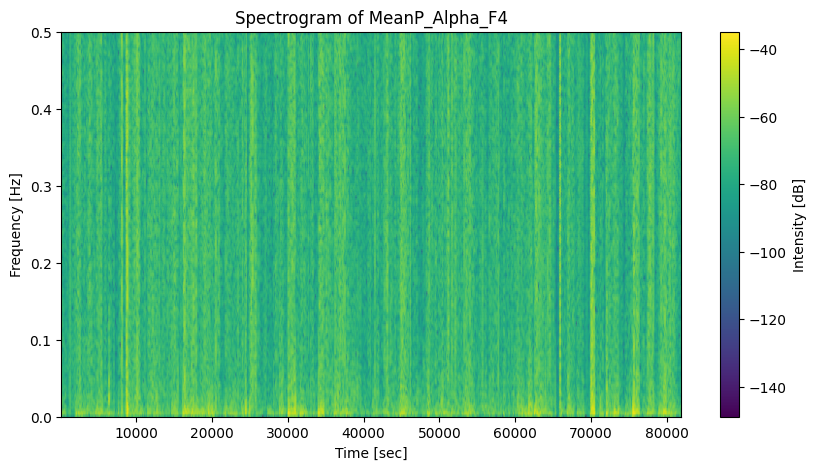

In [8]:
signal_data = cleaned_data['MeanP_Alpha_F4']

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal_data, fs=1, nperseg=256, noverlap=128)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of MeanP_Alpha_F4')
plt.colorbar(label='Intensity [dB]')
plt.show()

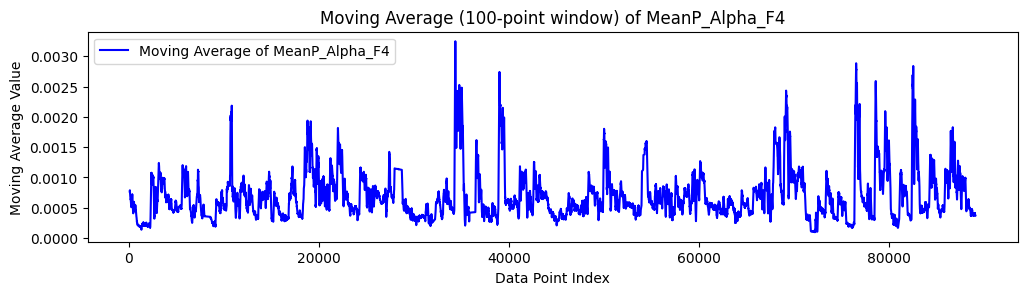

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot( cleaned_data['MeanP_Alpha_F4'].rolling(window=100).mean(), label='Moving Average of MeanP_Alpha_F4', color='blue')
plt.title('Moving Average (100-point window) of MeanP_Alpha_F4')
plt.xlabel('Data Point Index')
plt.ylabel('Moving Average Value')
plt.legend()

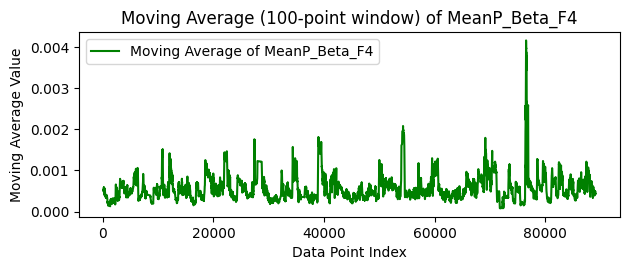

In [10]:
plt.subplot(2, 1, 2)
plt.plot(cleaned_data['MeanP_Beta_F4'].rolling(window=100).mean(), label='Moving Average of MeanP_Beta_F4', color='green')
plt.title('Moving Average (100-point window) of MeanP_Beta_F4')
plt.xlabel('Data Point Index')
plt.ylabel('Moving Average Value')
plt.legend()

plt.tight_layout()
plt.show()

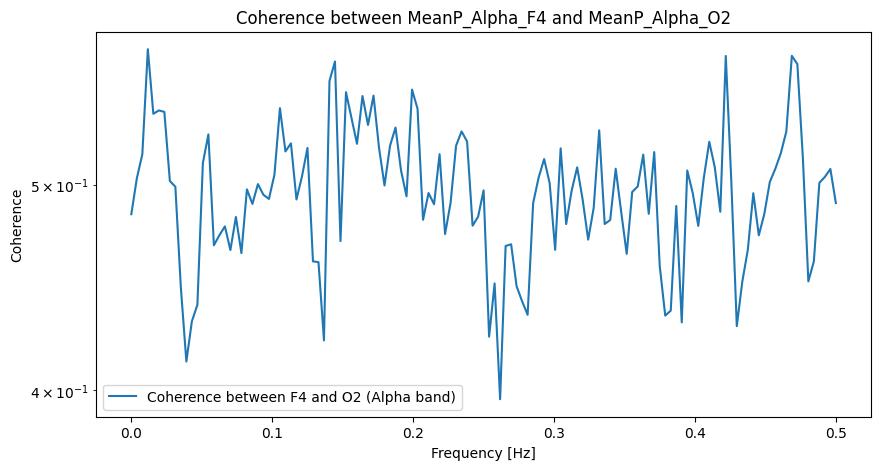

In [11]:
from scipy.signal import coherence

alpha_f4 = cleaned_data['MeanP_Alpha_F4'].values
alpha_o2 = cleaned_data['MeanP_Alpha_O2'].values

frequencies, coh = coherence(alpha_f4, alpha_o2, fs=1, nperseg=256)

# Plot coherence
plt.figure(figsize=(10, 5))
plt.semilogy(frequencies, coh, label='Coherence between F4 and O2 (Alpha band)')
plt.title('Coherence between MeanP_Alpha_F4 and MeanP_Alpha_O2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Coherence')
plt.legend()
plt.show()